In [1]:
from astropy.io import fits
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
from astropy.wcs import WCS
# specutils packages
from specutils import Spectrum1D
from specutils.analysis import line_flux
from specutils.fitting import fit_generic_continuum
from specutils.fitting import find_lines_threshold
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from specutils.analysis import centroid
from specutils.analysis import moment
from specutils.manipulation import extract_region
from specutils.fitting import find_lines_derivative
from scipy.signal import find_peaks
import seaborn as sns
import warnings
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f3557393c10>

In [2]:
hdu = fits.open("comb_PNc2_M2.fits")

In [3]:
nx, wav0, i0, dwav = [hdu[0].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
wavs = wav0 + (np.arange(nx) - (i0 - 1))*dwav 

In [5]:
hdudata = hdu[0].data
Flux = []
for i in range(406, 443):
    Flux.append(hdudata[i])
#Flux = hdudata
Flux_arr = np.array(Flux)
#Flux /= 1e-13

In [6]:
# Calculate the sum of elements across all rows (sum along axis 0)
Flux_sum = np.sum(Flux_arr, axis=0)
Flux_sum_= Flux_sum/1e-14

In [7]:
spec = Spectrum1D(flux=Flux_sum*u.Unit('erg cm-2 s-1 AA-1') , spectral_axis=wavs*u.AA)
sub_region = SpectralRegion(4900*u.AA, 9000*u.AA)
sub_spec = extract_region(spec, sub_region)
# Subtracting the continuum
with warnings.catch_warnings():  # Ignore warnings
    warnings.simplefilter('ignore')
    g1_fit = fit_generic_continuum(sub_spec )
y_continuum_fitted = g1_fit(sub_spec.spectral_axis)
spec_sub = sub_spec - y_continuum_fitted

In [94]:
lines_blue = find_lines_derivative(spec_sub, flux_threshold=0.1e-16)
#lines_blue = find_lines_derivative(spec_sub, flux_threshold=-1.2e-16)
#Mask emission
mask_blue = lines_blue["line_type"] == "emission"
lines_emiss_blue = lines_blue[mask_blue]
lines_emiss_blue 

line_center,line_type,line_center_index
Angstrom,,
float64,str10,int64
5008.123156232844,emission,17
...,...,...
8967.65145866396,emission,2024


(-0.1, 1.5)

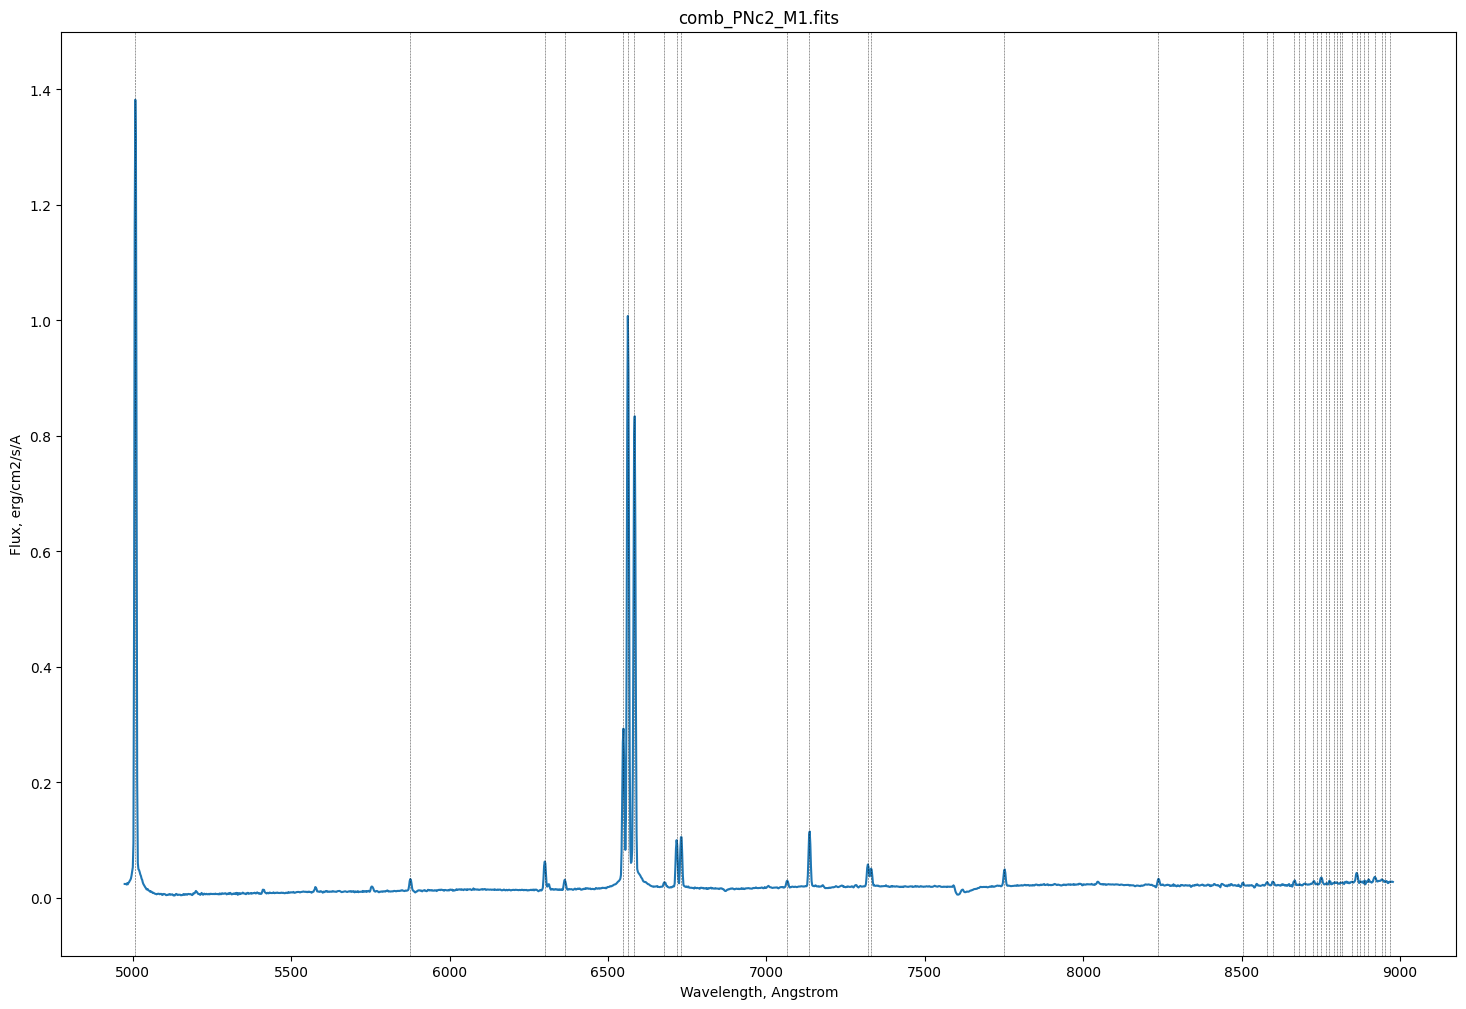

In [95]:
f, ax = plt.subplots(figsize=(18,12))  
plt.plot(wavs, Flux_sum_)
for wll in lines_emiss_blue["line_center"]:
    ax.axvline(wll, color='k', linewidth=0.4, alpha=0.7, linestyle='--')
#for wll in lines_emiss_red["line_center"]:
#    ax.axvline(wll, color='k', linewidth=0.4, alpha=0.7, linestyle='--')
plt.title("comb_PNc2_M1.fits")
plt.xlabel("Wavelength, Angstrom")
plt.ylabel("Flux, erg/cm2/s/A")
#plt.xlim(xmin=5140,xmax=5265)
plt.ylim(ymin=-0.1,ymax=1.5) 